In [4]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import pandas as pd
from utils.data_handler import DataHandler
from utils.plotter import Plotter
import matplotlib.pyplot as plt

xs, ys, stations = DataHandler.read_xyn("./stochModel/input_dflowfm/grid_locs_bk.xyn")

nc = xr.open_dataset("./stochObserver/sealevel_copernicus.nc")
nc.adt.interp(longitude=52.9, latitude=4.7).to_series()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


time
2014-05-22    0.861958
2014-05-23    0.873050
2014-05-24    0.882109
2014-05-25    0.890041
2014-05-26    0.895098
                ...   
2014-08-27    0.741068
2014-08-28    0.770888
2014-08-29    0.801684
2014-08-30    0.833119
2014-08-31    0.869655
Name: adt, Length: 102, dtype: float64

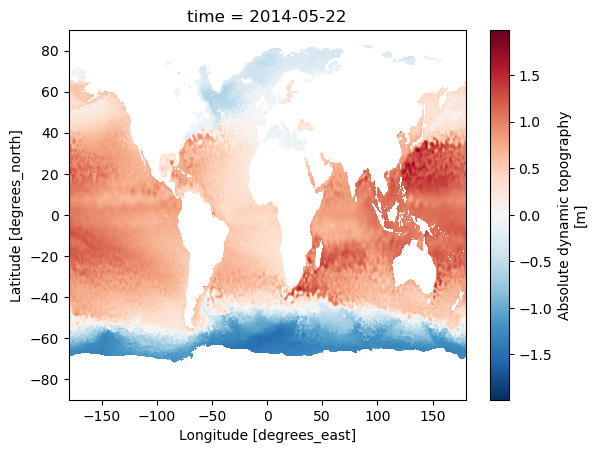

In [2]:
nc = xr.open_dataset("./stochObserver/sealevel_copernicus.nc")
nc.adt.isel(time=0).plot()
plt.savefig("cmems.png", bbox_inches="tight")

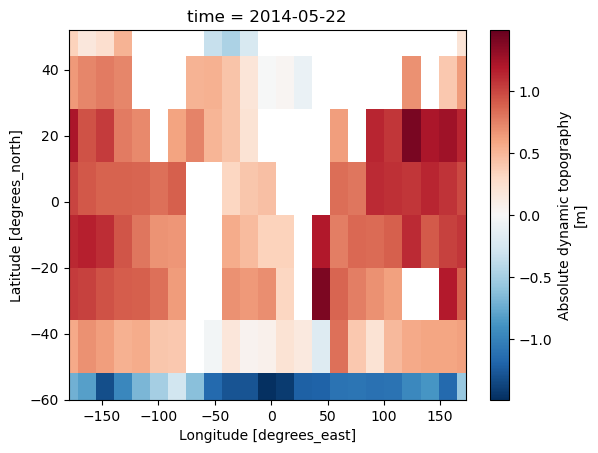

In [5]:
interp = nc.adt.interp(longitude=xs, latitude=ys).isel(time=0).sortby("longitude")
interp.plot()
plt.savefig("cmems_sampled.png", bbox_inches="tight")

In [11]:
df = pd.DataFrame(dict(lon=xs, lat=ys))
xs = df.lon.to_xarray()
ys = df.lat.to_xarray()

interp = nc.adt.isel(time=2).interp(longitude=xs, latitude=ys)
print(np.count_nonzero(np.isnan(interp)))
interp.values
# x = interp.longitude.values
# y = interp.latitude.values
# z = interp.values
# Plotter.plot_map(x, y, z, size=30, path="observations.png")

0


array([-0.723375, -0.819075, -1.3098  , -0.97155 , -0.67155 , -0.497325,
       -0.280275, -0.62375 , -1.166125, -1.288675, -1.280575, -1.490025,
       -1.436575, -1.227375, -1.208325, -1.098825, -1.090425, -1.12555 ,
       -1.1117  , -0.948975, -0.8769  , -1.15255 , -0.5597  ,  0.5621  ,
        0.6823  ,  0.6188  ,  0.52585 ,  0.554825,  0.4181  ,  0.394725,
       -0.052725,  0.157775,  0.054225,  0.062975,  0.2133  ,  0.145025,
       -0.196025,  0.8155  ,  0.404175,  0.222125,  0.4722  ,  0.559575,
        0.568175,  0.5844  ,  0.60715 ,  1.018975,  1.0177  ,  0.9486  ,
        0.91335 ,  0.884025,  0.813575,  0.63155 ,  0.67625 ,  0.64495 ,
        0.692425,  0.315575,  1.392575,  0.8762  ,  0.764825,  0.690625,
        0.600975,  1.1947  ,  0.88965 ,  1.124375,  1.1501  ,  1.0938  ,
        0.9414  ,  0.802925,  0.670175,  0.650375,  0.552075,  0.468025,
        0.3363  ,  0.34045 ,  1.185125,  0.743125,  0.862625,  0.831875,
        0.902275,  1.113425,  0.904   ,  0.998475, 